In [1]:
draft_mode = False
# %matplotlib inline
from front_matter import *
import matplotlib as mpl

First, load some Python packages.

In [2]:
import numpy as np # for numerics
import sympy as sp # for symbolics
import control as c # the Control Systems module!

In [3]:
S,kp,ki,kd = sp.symbols('S kp ki kd')

In [4]:
G_sym = 15000/(S**4+50*S**3+875*S**2+6250*S+15000)

In [5]:
s = c.TransferFunction.s

In [6]:
def sym_to_tf(tf_sym,s_var):
    S = s_var
    s = sp.symbols('s')
    tf_sym = tf_sym.subs(S,s)
    tf_str = str(tf_sym)
    s = c.TransferFunction.s
    ldict = {}
    exec('tf_out = '+tf_str,globals(),ldict)
    tf_out = ldict['tf_out']
    return tf_out

In [7]:
def pid_CL_tf(plant_tf,Kp=0,Ki=0,Kd=0):
    s = c.TransferFunction.s
    C_pid_tf = Kp + Ki/s + Kd*s
    return c.feedback(C_pid_tf*plant_tf)

In [8]:
G_tf = sym_to_tf(G_sym,S)

In [9]:
pid_CL_tf(G_tf,Kp=1)


                1.5e+04
---------------------------------------
s^4 + 50 s^3 + 875 s^2 + 6250 s + 3e+04

In [49]:
%matplotlib widget
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt

t_step = np.linspace(0,3,200)
sys_CL = pid_CL_tf(G_tf,Kp=1)
t_step,y_step = c.step_response(sys_CL, t_step)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(t_step, y_step)
plt.xlabel('time (s)')
plt.ylabel('step response')

def update(Kp = 1.0, Ki = 0.0, Kd = 0.0):
    global sys_CL, t_step
    sys_CL = pid_CL_tf(G_tf,Kp=Kp,Ki=Ki,Kd=Kd)
    t_step,y_step = c.step_response(sys_CL, t_step)
    line.set_ydata(y_step)
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw_idle()

interact(update,Kp=(0.0,10.0),Ki=(0.0,20.0),Kd=(0.0,1.0));

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(FloatSlider(value=1.0, description='Kp', max=10.0), FloatSlider(value=0.0, description='…

In [12]:
pxfer(
  fig_name=fig,
  draft_mode=draft_mode,
  filename=the_notebook,
  linewidth=1, 
  bbox_inches='tight',
  output_type='pdf',
)

<IPython.core.display.Latex object>

Now consider $f_2$.

In [13]:
A = Matrix([[10,0],[0,20]])
b = Matrix([[1,1]])
def f2(x):
  X = Array([x]).tomatrix().T
  return 1/2*X.dot(A*X) - b.dot(X)
gd = gradient_descent_min(f=f2,x=x,x0=[50,-40],T=1e-8)

Perform the gradient descent.

In [14]:
gd.descend()

Print the interesting variables.

In [15]:
print(gd.table['python'])

  N  x_k            g_k                        alpha
---  -------------  ---------------------  ---------
  0  [ 50 -40]      [ 499. -801.]          0
  1  [17.58 12.04]  [ 499. -801.]          0.0649741
  2  [ 8.07 -1.01]  [174.78 239.88]        0.0544221
  3  [3.62 0.17]    [ 79.66 -21.22]        0.0558582
  4  [ 0.49 -0.05]  [35.16  2.49]          0.0889491
  5  [0.1  0.14]    [ 3.89 -1.94]          0.0990201
  6  [0.1 0. ]      [0.04 1.9 ]            0.0750849
  7  [0.1  0.05]    [ 0.01 -0.95]          0.050005
  8  [0.1  0.05]    [4.74e-03 9.58e-05]    0.0500012
  9  [0.1  0.05]    [ 2.37e-03 -2.38e-09]  0.0999186
 10  [0.1  0.05]    [1.93e-06 2.37e-09]    0.1
 11  [0.1  0.05]    [ 0.00e+00 -2.37e-09]  0.0999997


In [16]:
Latex(gd.table['latex'])

<IPython.core.display.Latex object>

Now let's `lambdify` the function `f2` so we can plot.

In [17]:
f2_lambda = lambdify((x1,x2),f2(x),'numpy')

Now let's plot a contour plot with the gradient descent overlaid.

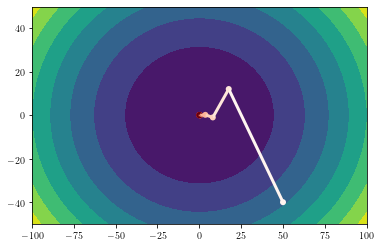

In [18]:
fig, ax = plt.subplots()
# contour plot
X1 = np.linspace(-100,100,100)
X2 = np.linspace(-50,50,100)
X1, X2 = np.meshgrid(X1,X2)
F2 = f2_lambda(X1,X2)
plt.contourf(X1,X2,F2)
# gradient descent plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
xX1 = gd.xk[:,0]
xX2 = gd.xk[:,1]
points = np.array([xX1, xX2]).T.reshape(-1, 1, 2)
segments = np.concatenate(
  [points[:-1], points[1:]], axis=1
)
lc = LineCollection(
  segments, 
  cmap=plt.get_cmap('Reds')
)
lc.set_array(np.linspace(0,1,len(xX1))) # color segs
lc.set_linewidth(3)
ax.autoscale(False) # avoid the scatter changing lims
ax.add_collection(lc)
ax.scatter(
  xX1,xX2,
  zorder=1,
  marker="o",
  color=plt.cm.Reds(np.linspace(0,1,len(xX1))),
  edgecolor='none'
)
plt.show()

In [19]:
pxfer(
  fig_name=fig,
  draft_mode=draft_mode,
  filename=the_notebook,
  linewidth=1, 
  bbox_inches='tight',
  output_type='pdf',
)

<IPython.core.display.Latex object>